In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("icecream_data.csv")
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


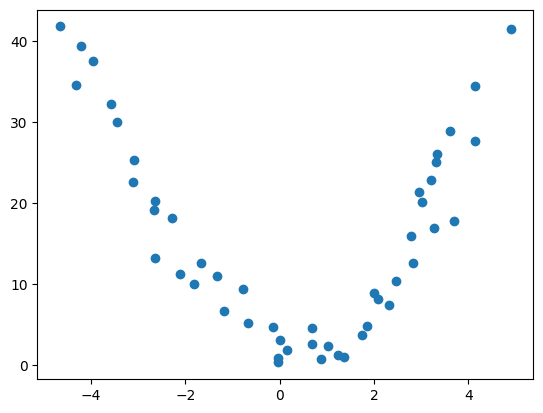

In [11]:
plt.scatter(df["Temperature (°C)"],df["Ice Cream Sales (units)"])

In [20]:
x = df.iloc[:,:1]
y = df.iloc[:,1]
y

0     41.842986
1     34.661120
2     39.383001
3     37.539845
4     32.284531
5     30.001138
6     22.635401
7     25.365022
8     19.226970
9     20.279679
10    13.275828
11    18.123991
12    11.218294
13    10.012868
14    12.615181
15    10.957731
16     6.689123
17     9.392969
18     5.210163
19     4.673643
20     0.328626
21     0.897603
22     3.165600
23     1.931416
24     2.576782
25     4.625689
26     0.789974
27     2.313806
28     1.292361
29     0.953115
30     3.782570
31     4.857988
32     8.943823
33     8.170735
34     7.412094
35    10.336631
36    15.996620
37    12.568237
38    21.342916
39    20.114413
40    22.839406
41    16.983279
42    25.142082
43    26.104740
44    28.912188
45    17.843957
46    34.530743
47    27.698383
48    41.514822
Name: Ice Cream Sales (units), dtype: float64

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
p = PolynomialFeatures(degree = 2)

In [28]:
x_poly = p.fit_transform(x)
x_poly

array([[ 1.00000000e+00, -4.66226268e+00,  2.17366933e+01],
       [ 1.00000000e+00, -4.31655945e+00,  1.86326855e+01],
       [ 1.00000000e+00, -4.21398476e+00,  1.77576676e+01],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01],
       [ 1.00000000e+00, -3.45571170e+00,  1.19419433e+01],
       [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00],
       [ 1.00000000e+00, -3.08130332e+00,  9.49443018e+00],
       [ 1.00000000e+00, -2.67246083e+00,  7.14204687e+00],
       [ 1.00000000e+00, -2.65228679e+00,  7.03462523e+00],
       [ 1.00000000e+00, -2.65149803e+00,  7.03044182e+00],
       [ 1.00000000e+00, -2.28826400e+00,  5.23615213e+00],
       [ 1.00000000e+00, -2.11186969e+00,  4.45999359e+00],
       [ 1.00000000e+00, -1.81893761e+00,  3.30853403e+00],
       [ 1.00000000e+00, -1.66034773e+00,  2.75675458e+00],
       [ 1.00000000e+00, -1.32637898e+00,  1.75928121e+00],
       [ 1.00000000e+00, -1.17312327e+00

In [27]:
x.loc[0]

Temperature (°C)   -4.662263
Name: 0, dtype: float64

In [29]:
x_poly[0]

array([ 1.        , -4.66226268, 21.73669327])

In [30]:
lr = LinearRegression()

In [37]:
x_poly_train,y_train,x_poly_test,y_test = train_test_split(x_poly,y,test_size = 0.2, random_state = 33)

In [38]:
lr.fit(x_poly,y)

LinearRegression()

In [39]:
y_pred = lr.predict(x_poly)

In [41]:
r2_score(y,y_pred)

0.9321137090423876

In [42]:
import joblib

In [43]:
joblib.dump(lr,"icecreamsales.joblib")

['icecreamsales.joblib']